In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

data = pd.read_csv("data.csv", encoding="latin-1")
data 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# **Data Cleaning**

In [2]:
data = data.drop("id", axis=1) #we dont need the id

data = data.drop("Unnamed: 32", axis=1) #null column???

diagnosis_mapping = {'B': 0, 'M': 1}
data['diagnosis'] = data['diagnosis'].map(diagnosis_mapping)

In [3]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Data Visualisation**

In [4]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Repartir les colonnes selon quel type elles appartiennent** 

In [5]:
mean_features = list(data.columns[1:11])
se_features = list(data.columns[11:21])
worst_features = list(data.columns[21:31])

In [6]:
mean_features.append('diagnosis')
se_features.append('diagnosis')
worst_features.append('diagnosis')

**Noticing Accuracy between the target feature and the feature of each type, then selecting some columns to avoid risk of overfitting and repetitive columns (redondance)**

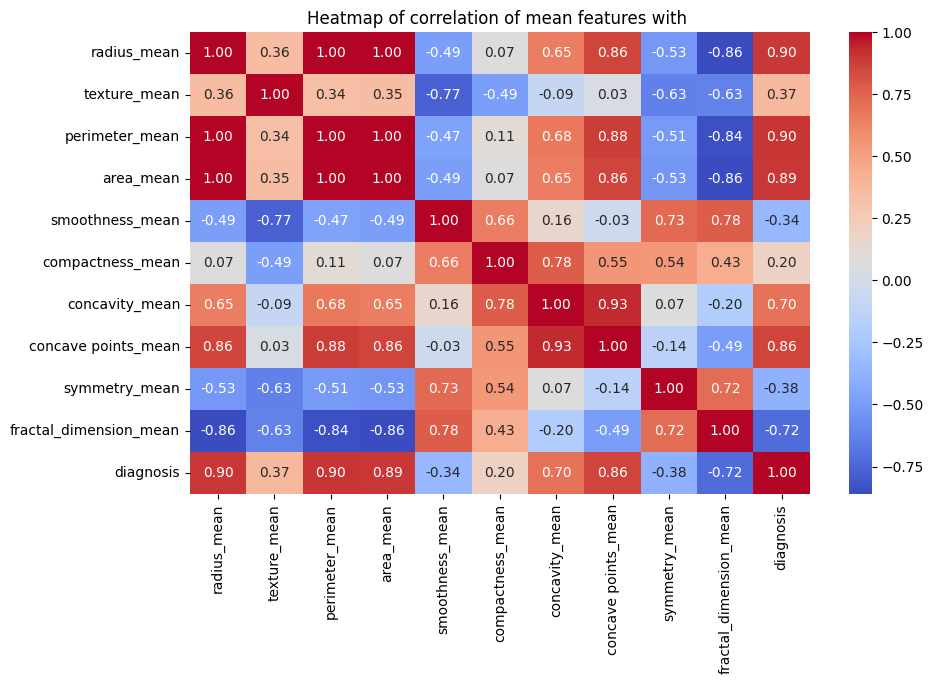

In [7]:
mean_data = data[mean_features].corr()

# Créez la heatmap
plt.figure(figsize=(10, 6))  
heatmap = sns.heatmap(mean_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of correlation of mean features with ")

# Affichez la heatmap
plt.show()

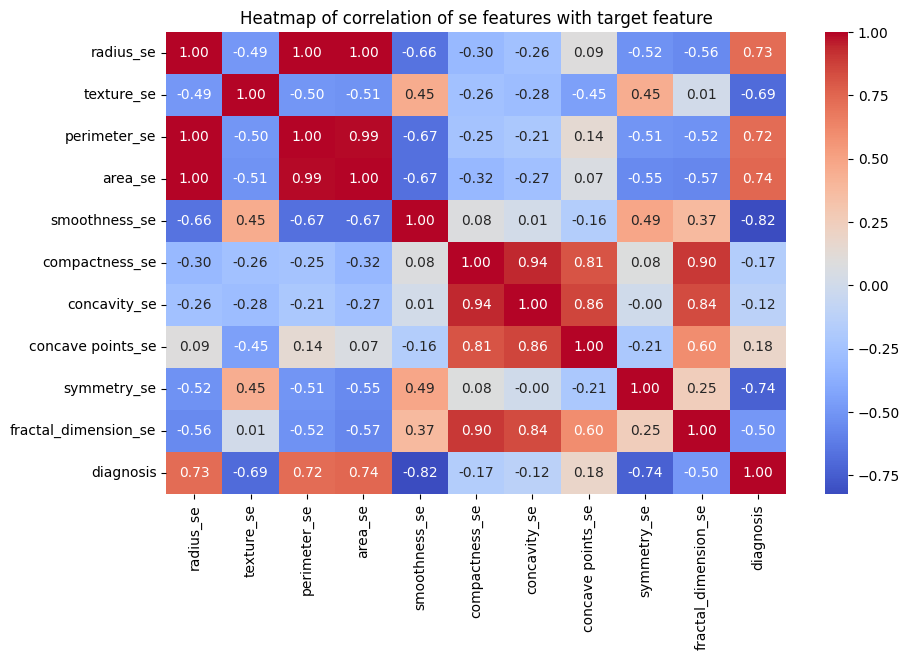

In [8]:
se_data = data[se_features].corr()

# Créez la heatmap
plt.figure(figsize=(10, 6))  # Définissez la taille de la figure
heatmap = sns.heatmap(se_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of correlation of se features with target feature")

# Affichez la heatmap
plt.show()

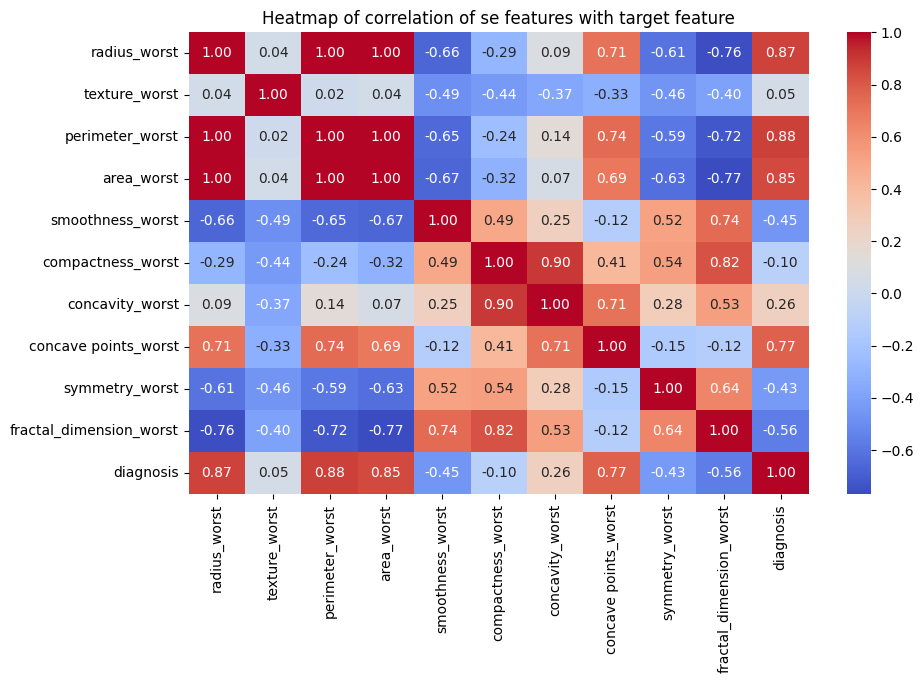

In [9]:
worst_data = data[worst_features].corr()

# Créez la heatmap
plt.figure(figsize=(10, 6))  # Définissez la taille de la figure
heatmap = sns.heatmap(worst_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of correlation of se features with target feature")

# Affichez la heatmap
plt.show()

In [10]:
worst_data = data[worst_features].corr()
worst_data

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


**The limited dataset that we will use**

In [11]:
prediction_variables = ['radius_mean','perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                   'radius_se', 'area_se','radius_worst', 'perimeter_worst', 'compactness_worst']
prediction_variables.append('diagnosis')

# **Data split**

In [12]:
# creating features and label 
data = data[prediction_variables]
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']
acc=0
best=0

***KN Model is the best fitted for this classification problem, and finding the best data split to have the best accuracy.
After noticing that the accurancy changed at every run due to not using random state and achieving +98 acc, we made a loop to obtain the best data split possible to achieve it everytime. Instead of changing manually random state to obtain this data split we made a loop that has a minimum thresold to reach***

In [14]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
while acc <0.983:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rnd = KNeighborsClassifier()
    rnd.fit(X_train, y_train)
    acc = rnd.score(X_test,y_test)
    acc
    if acc > best:
        best = acc



In [15]:
acc

0.9883040935672515

# **Five numbers only ACCURACY**

In [16]:

formatted_acc = "{:.5f}".format(acc)

print(formatted_acc)


0.98830


# DEEP LEARNING PART

In [17]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

importing the model

In [18]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Spliting the dataset

In [19]:
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

**training the model**

In [20]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/100
7/7 [==============================] - 1s 54ms/step - loss: 10.1243 - accuracy: 0.4623 - val_loss: 8.8604 - val_accuracy: 0.6374
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 5.9862 - accuracy: 0.6131 - val_loss: 4.0386 - val_accuracy: 0.3801
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 3.3882 - accuracy: 0.4322 - val_loss: 0.9401 - val_accuracy: 0.7251
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 1.2396 - accuracy: 0.7060 - val_loss: 1.4076 - val_accuracy: 0.5497
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 1.2165 - accuracy: 0.6030 - val_loss: 0.8360 - val_accuracy: 0.7778
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 1.0130 - accuracy: 0.7663 - val_loss: 0.8823 - val_accuracy: 0.6550
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.8151 - accuracy: 0.7312 - val_loss: 0.5461 - val_accuracy: 0.8304
Epoch 8/100
7/7 [========

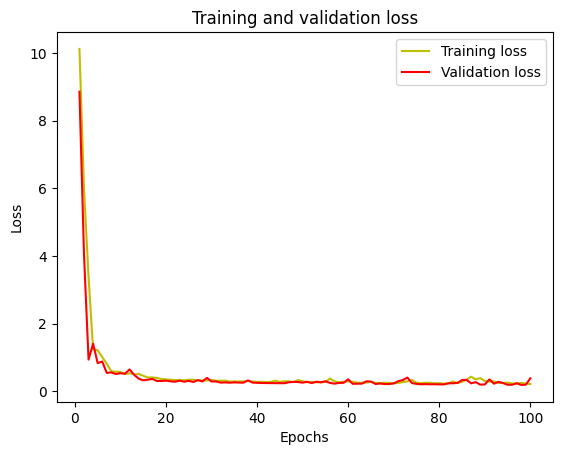

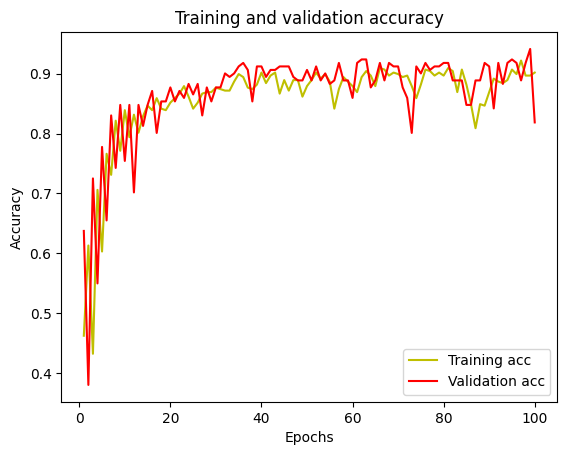

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()